In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")






# Stage-1 : Business Problem Understanding
          # - Restaurant owner wants detailed report on sales
          # - Whatever the data I have provided



In [3]:
# Stage-2 : Data Understanding

# Load the data :

df = pd.read_csv("RestaurantData.csv")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


# Data Exploration  :- 
                       # Understanding dataset very clearly like understanding mean,mode,median,min,max,null,duplicates,...

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df["total_bill"].describe()  # total_bill column is the discrete continous variable

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [7]:
df["tip"].describe()  # tip column is the discrete continous variable

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [8]:
df["sex"].describe()  # sex column is the discrete categorical variable

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [9]:
df["smoker"].describe()  # smoker column is the discrete categorical variable

count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

In [10]:
df["day"].describe()  # day column is the discrete categorical variable

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [11]:
df["time"].describe()  # time column is the discrete categorical variable

count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

In [27]:
df["size"].describe() # size column is the discrete count variable , but here we should not apply describe function on the descrete count variable 
                                                                     # because that will not make any sense

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [16]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [17]:
df["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [21]:
df["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [22]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [23]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [24]:
df["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [26]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

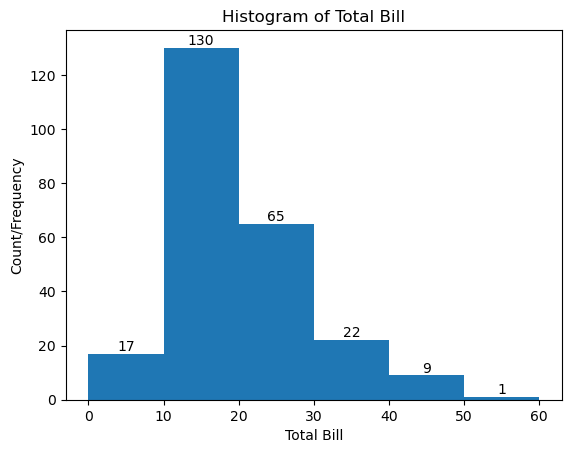

In [28]:
n,bins,patches = plt.hist(df["total_bill"],bins=6,range=(0,60))
plt.bar_label(patches)
plt.xlabel("Total Bill")
plt.ylabel("Count/Frequency")
plt.title("Histogram of Total Bill")
plt.xticks(list(range(0,61,10)))
plt.show()

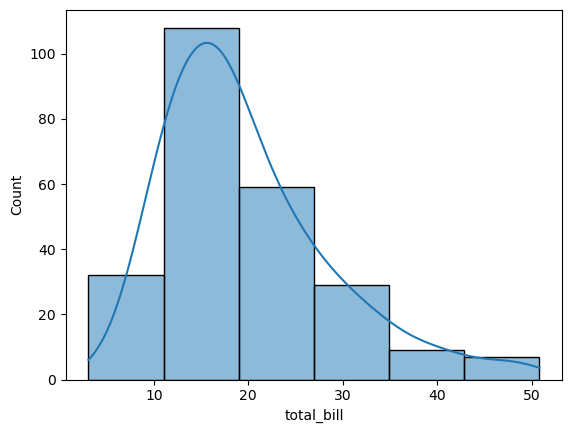

In [29]:
sns.histplot(df["total_bill"],bins=6,kde=True)
plt.show()

In [32]:
df["total_bill"].skew()

1.1332130376158205

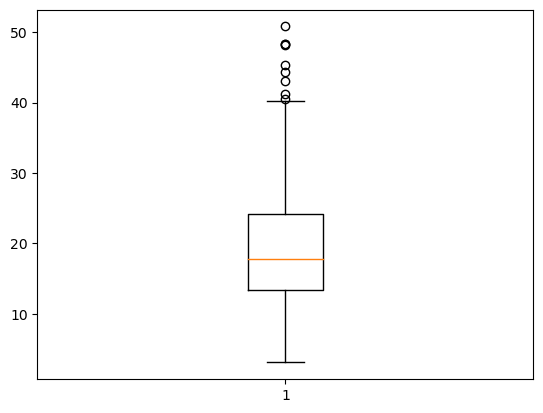

In [37]:
plt.boxplot(df["total_bill"])
plt.show()

# Here we have outliers but should not remove them or replace them we have to retain them and continue the process.

# Stage-3 : Exploratory Data Analysis(EDA)/Data preaparation 

In [47]:
EDA/Data preaparation:
    
# 1) Data Cleaning( Wrong data, wrong datatypes, duplicates, missing values, outliers) : 

print(df.duplicated().sum())
df[df.duplicated()]

# Here we should not drop the duplicates because there is not possibilities of a person comes at a same restaurant at a same time two times.


1


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [61]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [62]:
# 2) Feature Engineering(add new features/columns, if required)   ---> This is not required in this project
# 3) Feature Selection(Removing unimportant features from dataset)---> This is not required in this project 


# Stage-4 : Analysis
           # - Create the multiple questions on given data and extract information(and find the answers of that questions)
           # - By using (combination of) pandas and seaborn, we can do complete ANALYSIS on a Dataset.

In [50]:
# What is the income of restaurant on each day?
# ---> ANS

df.groupby("day")["total_bill"].sum()

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [51]:
# On which day more females are coming to restaurant?
# ---> ANS
pd.crosstab(df["day"],df["sex"])

sex,Female,Male
day,,
Fri,9,10
Sat,28,59
Sun,18,58
Thur,32,30


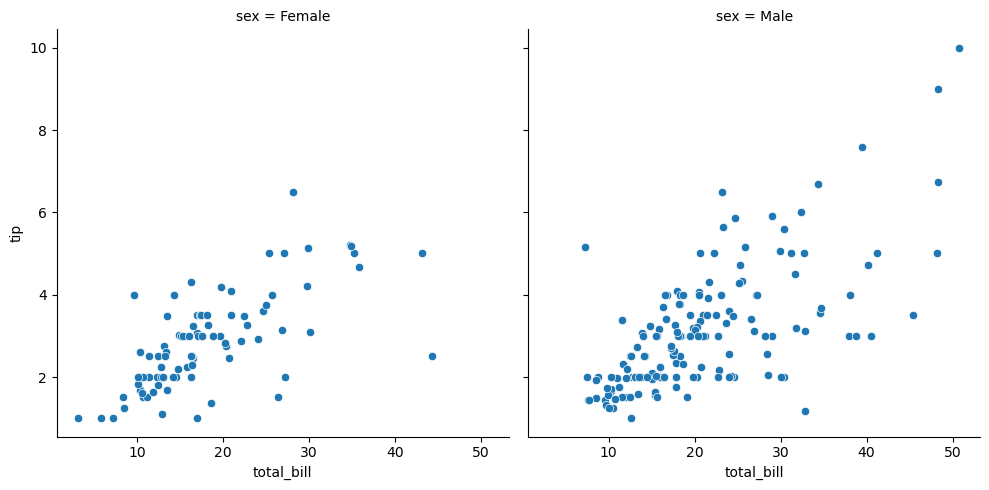

In [53]:
# What is the tip given by males & females seperately with total bill?
#--->ANS
sns.relplot(x=df["total_bill"],y=df["tip"],col=df["sex"])
plt.show()

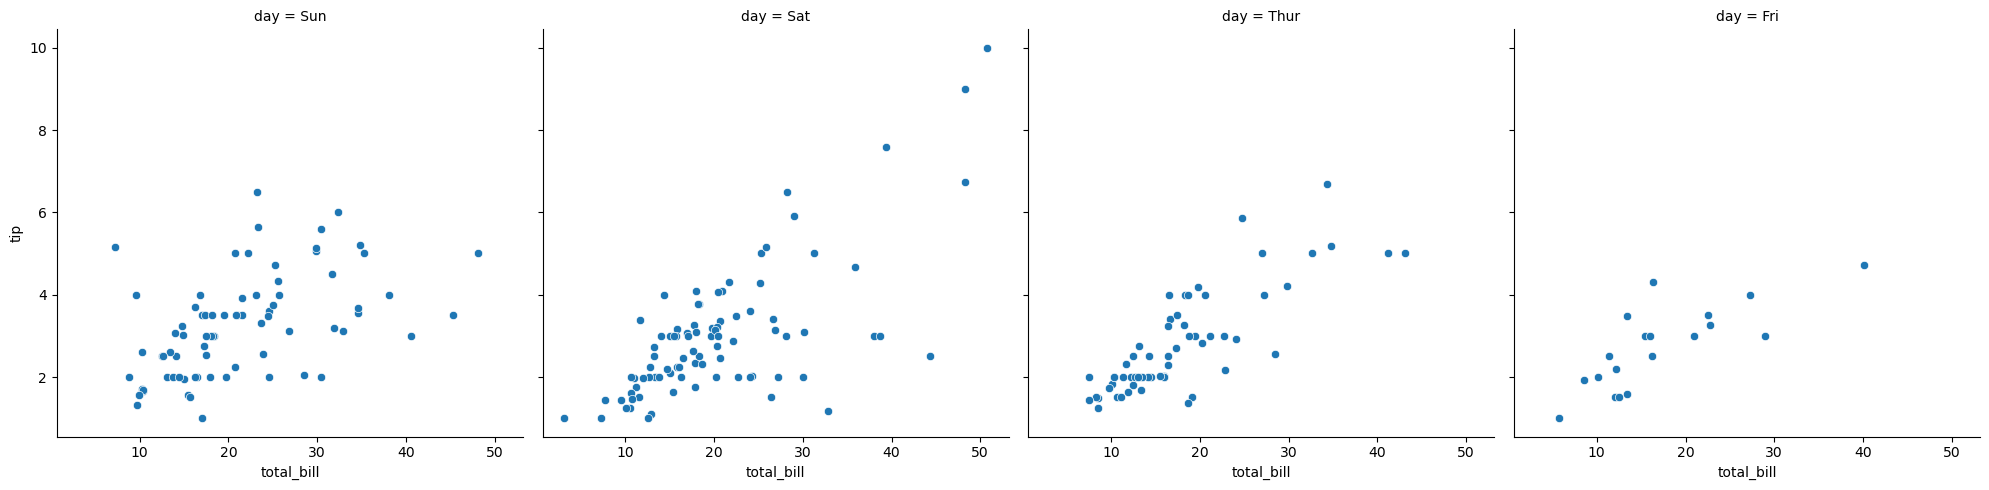

In [54]:
sns.relplot(x=df["total_bill"],y=df["tip"],col=df["day"])
plt.show()

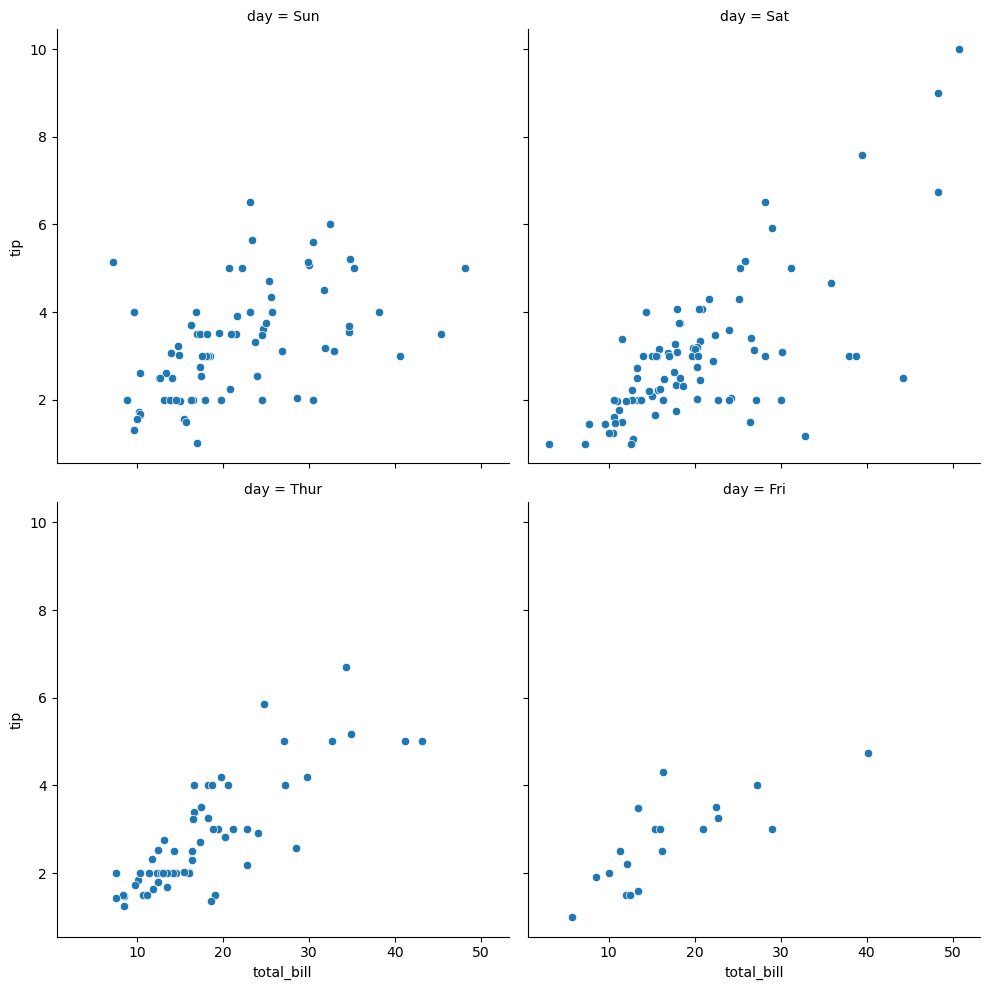

In [56]:
sns.relplot(x=df["total_bill"],y=df["tip"],col=df["day"],col_wrap=2)
plt.show()

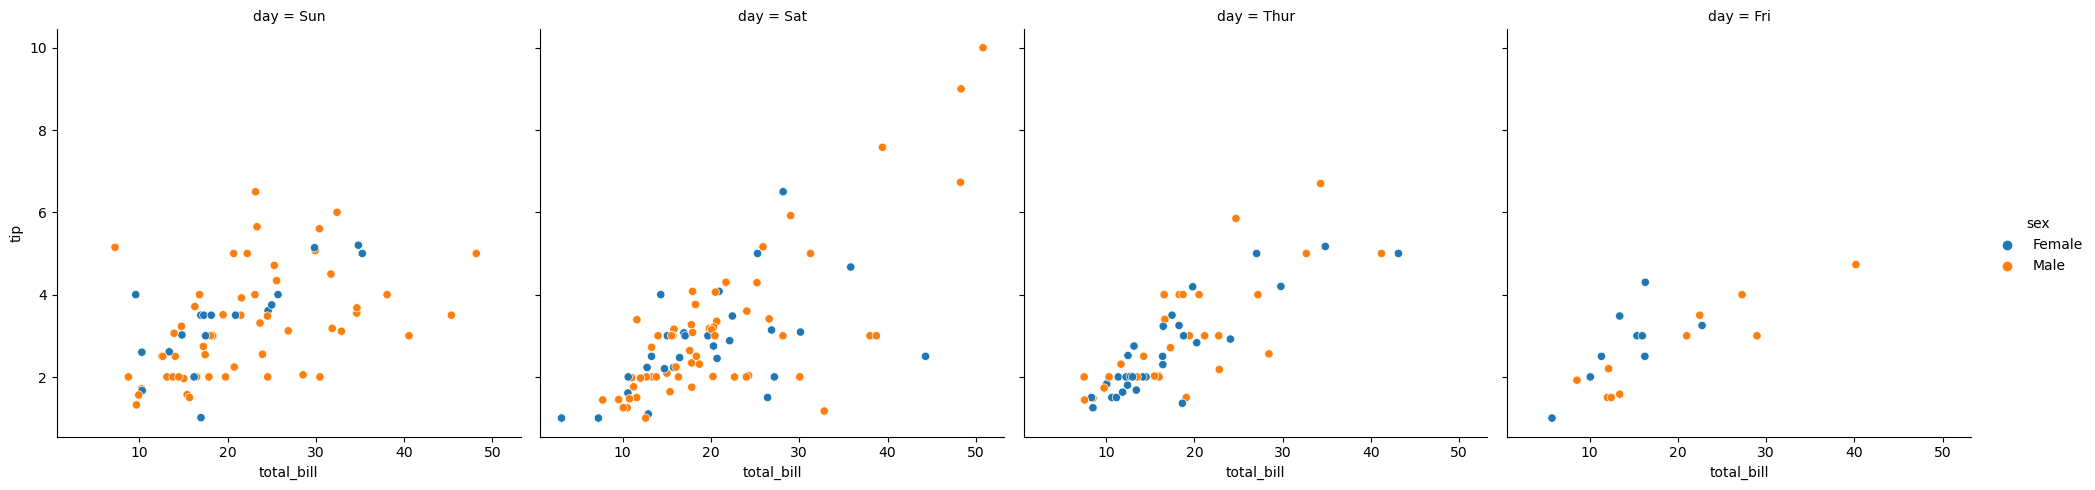

In [60]:
sns.relplot(x=df["total_bill"],y=df["tip"],hue=df["sex"],col=df["day"])
plt.show()

# Here we have more than 3 variables(4 variables), so we have use relplot.

In [ ]:
# Stage-5 : Presentation 

          # We have to write the all the observations that we have done while drawing(coding) the plots 
          # and while doing the complete analysis.